# Model complexity and Bias Variance Tradeoff

# Fire up pandas / sklearn


In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
from  sklearn.metrics import mean_squared_error
%matplotlib inline
import sklearn
print sklearn.__version__

0.19.0


In [38]:
# conda update scikit-learn 

help(sklearn.metrics.regression)

Help on module sklearn.metrics.regression in sklearn.metrics:

NAME
    sklearn.metrics.regression - Metrics to assess performance on regression task

FILE
    c:\anaconda2\lib\site-packages\sklearn\metrics\regression.py

DESCRIPTION
    Functions named as ``*_score`` return a scalar value to maximize: the higher
    the better
    
    Function named as ``*_error`` or ``*_loss`` return a scalar value to minimize:
    the lower the better

FUNCTIONS
    explained_variance_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
        Explained variance regression score function
        
        Best possible score is 1.0, lower values are worse.
        
        Read more in the :ref:`User Guide <explained_variance_score>`.
        
        Parameters
        ----------
        y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
            Ground truth (correct) target values.
        
        y_pred : array-like of shape = (n_samples) or (n_samples,

Next we're going to write a polynomial function that takes an DataFrame and a maximal degree and returns an DataFrame with columns containing the Series to all the powers up to the maximal degree.


Using the hints above complete the following function to create an DataFrame consisting of the powers of an Series up to a specific degree:

# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [25]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('dataset/kc_house_data.csv', dtype= dtype_dict)
sales = sales.sort_values(by=['sqft_living', 'price'])
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [28]:
lm1 = LinearRegression()
lm1.fit(sales[["sqft_living"]], sales[["price"]])
(lm1.intercept_, lm1.coef_)



(array([-43580.74309447]), array([[ 280.6235679]]))

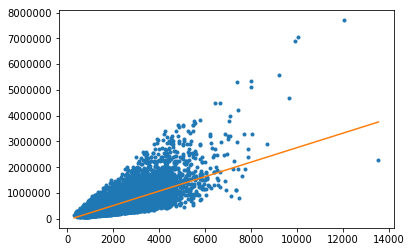

In [31]:
plt.plot(sales['sqft_living'],sales['price'],'.',
        sales['sqft_living'], lm1.predict(sales[['sqft_living']]))

# Train test split

In [5]:
train, test = train_test_split(sales, test_size=0.2, random_state=0)

In [32]:
len(sales)

21613

In [33]:
len(train)

17290

In [34]:
len(test)

4323

In [9]:
lm1 = LinearRegression()
lm1.fit(train[["sqft_living"]], train[["price"]])
(lm1.intercept_, lm1.coef_)

(array([-42819.83758135]), array([[ 280.33804071]]))

In [10]:
lm2 = LinearRegression()
lm2.fit(train[["sqft_living", "bedrooms"]], train[["price"]])
(lm2.intercept_, lm2.coef_)

(array([ 77008.25625859]), array([[   312.49068747, -55370.23967698]]))

In [11]:
help(lm2.score)

Help on method score in module sklearn.base:

score(self, X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : 

# Train Error 

In [35]:
lm1.score(train[["sqft_living"]], train[["price"]])

0.49632873278554884

In [36]:
lm2.score(train[["sqft_living", "bedrooms"]], train[["price"]])

0.50954640231437809

# Test Error

In [14]:
lm1.score(test[["sqft_living"]], test[["price"]])

0.47875695056355583

In [15]:
lm2.score(test[["sqft_living", "bedrooms"]], test[["price"]])

0.49559546535131155

Conclusion: lm2 is better!

# RMSE 

In [16]:
mean_squared_error(test[["price"]], lm2.predict(test[["sqft_living", "bedrooms"]]))

67591944552.586945

In [17]:
mean_squared_error(train[["price"]], lm2.predict(train[["sqft_living", "bedrooms"]]))

66193290518.572052

In [39]:
print lm2.predict(test[["sqft_living", "bedrooms"]].iloc[0:1])



[[ 714876.68809997]]


In [52]:
test.iloc[0:1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20877,1081330180,20141222T000000,627000.0,4.0,2.5,2750.0,11830,2,0,0,...,9,2750,0,2014,0,98059,47.4698,-122.121,2310.0,11830.0
